In [1]:
from numpy.random import default_rng
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
rng = default_rng(seed=20240316)

num_weeks = 1e5
positions = []
proposals = []
results = []

current = 5

for _ in range(int(num_weeks)):
    # record current position
    positions.append(current)
    # flip coin to generate proposal
    proposal = current + rng.choice([-1, 1])
    # now make sure he loops around the archipelago
    if proposal < 1:
        proposal = 10
    elif proposal > 10:
        proposal = 1
    proposals.append(proposal)
    # decide whether to accept proposal or not
    prob_move = proposal / current
    if rng.random() < prob_move:
        current = proposal
        results.append(True)
    else:
        current = current
        results.append(False)

In [3]:
# https://stackoverflow.com/questions/39622575/calculate-pixel-coordinates-for-8-equidistant-points-on-a-circle
r = 10
numPoints = 10
points = []
for index in range(numPoints):
    points.append([r*math.cos((index*2*math.pi)/numPoints),r*math.sin((index*2*math.pi)/numPoints)])
points = np.array(points)

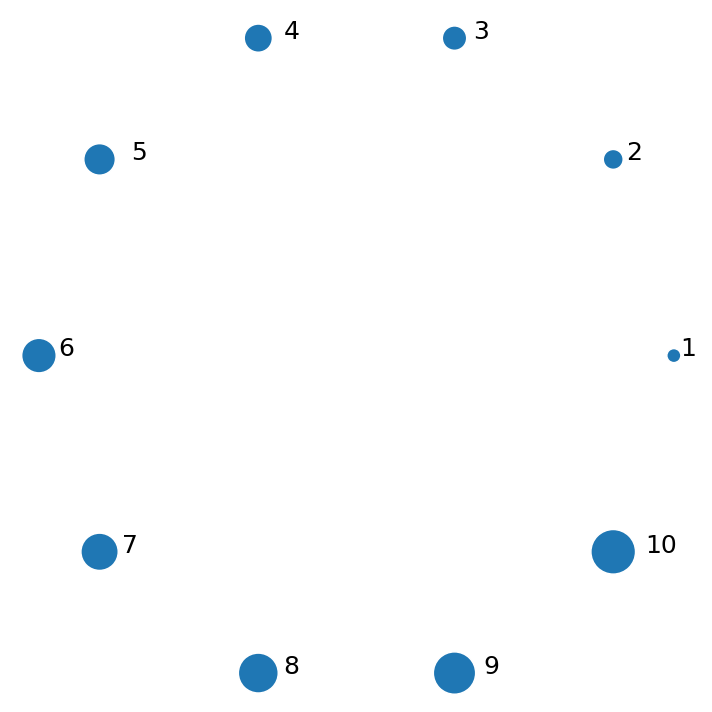

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
# remove the axis
ax.axis('off')
sns.scatterplot(x=points[:, 0], y=points[:, 1], s=100, ax=ax,
                size=range(1,11),
                legend=False, sizes=(200, 2000), 
                markers='o')
for i in range(1, 6):
    ax.annotate(i, (points[i - 1, 0] + 0.2 * i, points[i - 1, 1]), fontsize=25)
for i in range(6, 11):
    ax.annotate(i, (points[i - 1, 0] + 0.1 * i, points[i - 1, 1]), fontsize=25)
plt.tight_layout()

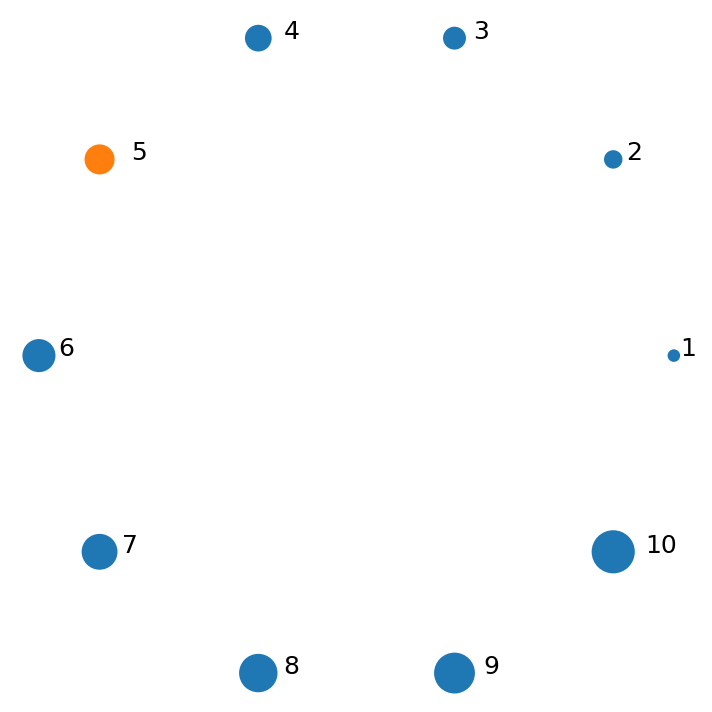

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
# remove the axis
ax.axis('off')
colors = [i == 5 for i in range(1, 11) ]
sns.scatterplot(x=points[:, 0], y=points[:, 1], s=100, ax=ax,
                size=range(1,11), hue=colors,
                legend=False, sizes=(200, 2000), 
                markers='o')
for i in range(1, 6):
    ax.annotate(i, (points[i - 1, 0] + 0.2 * i, points[i - 1, 1]), fontsize=25)
for i in range(6, 11):
    ax.annotate(i, (points[i - 1, 0] + 0.1 * i, points[i - 1, 1]), fontsize=25)
plt.tight_layout()

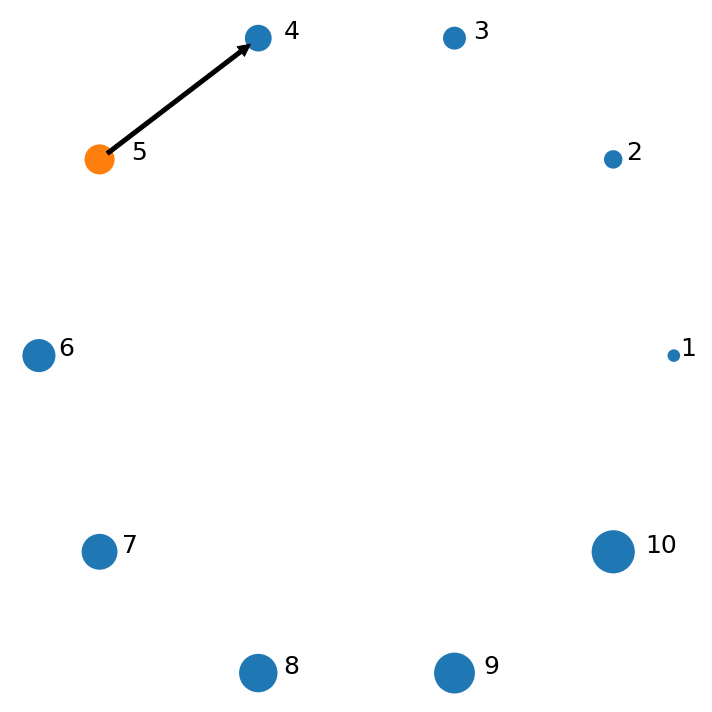

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
# remove the axis
ax.axis('off')
colors = [i == 5 for i in range(1, 11) ]
sns.scatterplot(x=points[:, 0], y=points[:, 1], s=100, ax=ax,
                size=range(1,11), hue=colors,
                legend=False, sizes=(200, 2000), 
                markers='o')
for i in range(1, 6):
    ax.annotate(i, (points[i - 1, 0] + 0.2 * i, points[i - 1, 1]), fontsize=25)
for i in range(6, 11):
    ax.annotate(i, (points[i - 1, 0] + 0.1 * i, points[i - 1, 1]), fontsize=25)
# draw an arrow to the proposed island
ax.annotate('', xy=points[3], xytext=points[4],
        arrowprops=dict(facecolor='black', shrink=0.05))
plt.tight_layout()

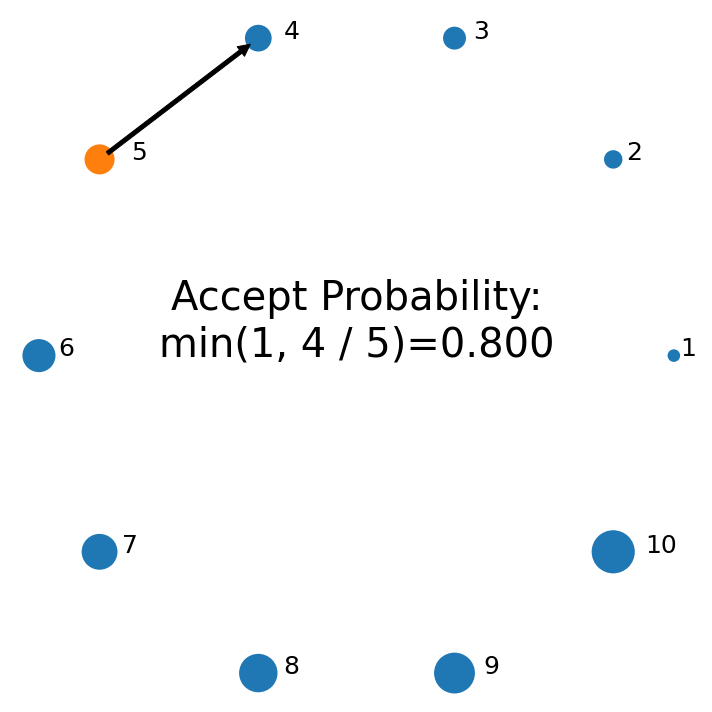

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
# remove the axis
ax.axis('off')
colors = [i == 5 for i in range(1, 11) ]
sns.scatterplot(x=points[:, 0], y=points[:, 1], s=100, ax=ax,
                size=range(1,11), hue=colors,
                legend=False, sizes=(200, 2000), 
                markers='o')
for i in range(1, 6):
    ax.annotate(i, (points[i - 1, 0] + 0.2 * i, points[i - 1, 1]), fontsize=25)
for i in range(6, 11):
    ax.annotate(i, (points[i - 1, 0] + 0.1 * i, points[i - 1, 1]), fontsize=25)
# draw an arrow to the proposed island
ax.annotate('', xy=points[3], xytext=points[4],
        arrowprops=dict(facecolor='black', shrink=0.05))
# write probability in the center
ax.annotate(f'Accept Probability:\nmin(1, 4 / 5)=0.800', (0, 0), fontsize=40, ha='center')
plt.tight_layout()

In [8]:
for idx in range(100):
    fig, ax = plt.subplots(figsize=(30, 10), ncols=3)
    # remove the axis
    ax[0].axis('off')
    colors = [i == (positions[idx]) for i in range(1, 11) ]
    sns.scatterplot(x=points[:, 0], y=points[:, 1], hue=colors, s=100, ax=ax[0],
                    size=range(1,11), 
                    legend=False, sizes=(200, 2000), 
                    markers='o', facecolors='black')
    # draw an arrow to the proposed island
    if results[idx]:
        ax[0].annotate('', xy=points[proposals[idx] - 1], xytext=points[positions[idx] - 1],
                arrowprops=dict(facecolor='green', shrink=0.05))
    else:
        ax[0].annotate('', xy=points[proposals[idx] - 1], xytext=points[positions[idx] - 1],
                arrowprops=dict(facecolor='red', shrink=0.05))
    for i in range(1, 6):
        ax[0].annotate(i, (points[i - 1, 0] + 0.2 * i, points[i - 1, 1]), fontsize=25)
    for i in range(6, 11):
        ax[0].annotate(i, (points[i - 1, 0] + 0.1 * i, points[i - 1, 1]), fontsize=25)
    
    # write probability in the center
    ax[0].annotate(f'Accept Probability:\nmin(1, {proposals[idx]} / {positions[idx]})={np.min([1.0, proposals[idx] / positions[idx]]):.3f}', (0, 0), fontsize=40, ha='center')

    ax[1].plot(range(idx+1), positions[:idx+1], 'o-', markersize=20, lw=2)
    ax[1].set_xlim(0, 100)
    ax[1].set_ylim(-0.1, 10.1)
    ax[1].set_title('Island visited', fontsize=40)
    ax[1].set_xlabel('Week', fontsize=40)
    ax[1].set_ylabel('Island', fontsize=40)

    ax[2].hist(positions[:idx+1], bins=range(1, 12), rwidth=0.5, align='left')
    ax[2].set_xlim(0, 11)
    ax[2].set_title('Histogram of islands visited', fontsize=40)
    ax[2].set_xticks(range(1, 11))
    ax[2].set_xlabel('Island', fontsize=40)
    ax[2].set_ylabel('number of weeks stayed', fontsize=40)
    plt.tight_layout()
    plt.savefig(f'island/frame{idx:07d}.png')
    plt.close()

In [9]:
for idx in [0,1,2,27,28]:
    fig, ax = plt.subplots(figsize=(30, 10), ncols=3)
    # remove the axis
    ax[0].axis('off')
    colors = [i == (positions[idx]) for i in range(1, 11) ]
    sns.scatterplot(x=points[:, 0], y=points[:, 1], hue=colors, s=100, ax=ax[0],
                    size=range(1,11), 
                    legend=False, sizes=(200, 2000), 
                    markers='o', facecolors='black')
    # draw an arrow to the proposed island
    if results[idx]:
        ax[0].annotate('', xy=points[proposals[idx] - 1], xytext=points[positions[idx] - 1],
                arrowprops=dict(facecolor='green', shrink=0.05))
    else:
        ax[0].annotate('', xy=points[proposals[idx] - 1], xytext=points[positions[idx] - 1],
                arrowprops=dict(facecolor='red', shrink=0.05))
    for i in range(1, 6):
        ax[0].annotate(i, (points[i - 1, 0] + 0.2 * i, points[i - 1, 1]), fontsize=25)
    for i in range(6, 11):
        ax[0].annotate(i, (points[i - 1, 0] + 0.1 * i, points[i - 1, 1]), fontsize=25)
    
    # write probability in the center
    ax[0].annotate(f'Accept Probability:\nmin(1, {proposals[idx]} / {positions[idx]})={np.min([1.0, proposals[idx] / positions[idx]]):.3f}', (0, 0), fontsize=40, ha='center')

    ax[1].plot(range(idx+1), positions[:idx+1], 'o-', markersize=20, lw=2)
    ax[1].set_xlim(0, 30)
    ax[1].set_ylim(-0.1, 10.1)
    ax[1].set_title('Island visited', fontsize=40)
    ax[1].set_xlabel('Week', fontsize=40)
    ax[1].set_ylabel('Island', fontsize=40)

    ax[2].hist(positions[:idx+1], bins=range(1, 12), rwidth=0.5, align='left')
    ax[2].set_xlim(0, 11)
    ax[2].set_title('Histogram of islands visited', fontsize=40)
    ax[2].set_xticks(range(1, 11))
    ax[2].set_xlabel('Island', fontsize=40)
    ax[2].set_ylabel('number of weeks stayed', fontsize=40)
    plt.tight_layout()
    plt.savefig(f'island/extra_{idx}.png')
    plt.close()

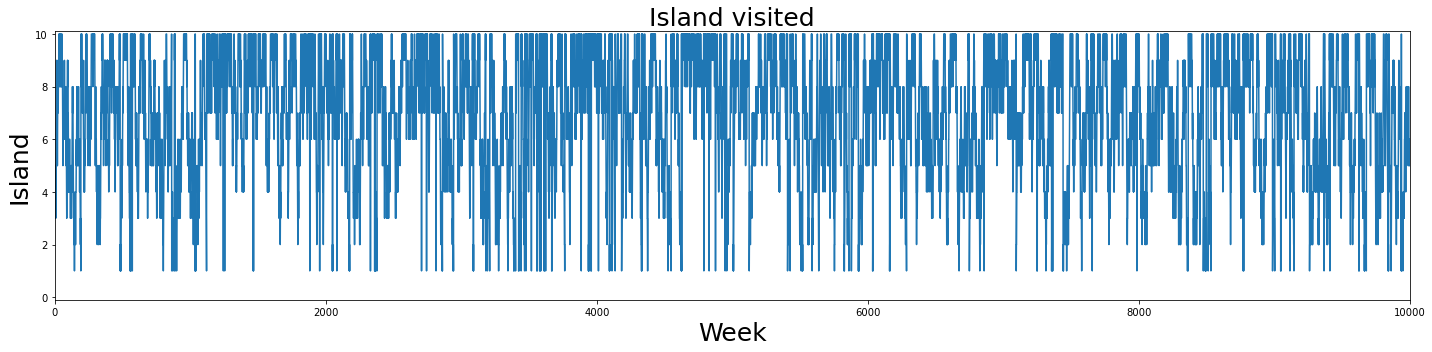

In [10]:
idx = 10000
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(range(idx+1), positions[:idx+1], '-')
ax.set_xlim(0, 10000)
ax.set_ylim(-0.1, 10.1)
ax.set_title('Island visited', fontsize=25)
ax.set_xlabel('Week', fontsize=25)
ax.set_ylabel('Island', fontsize=25)
plt.tight_layout()

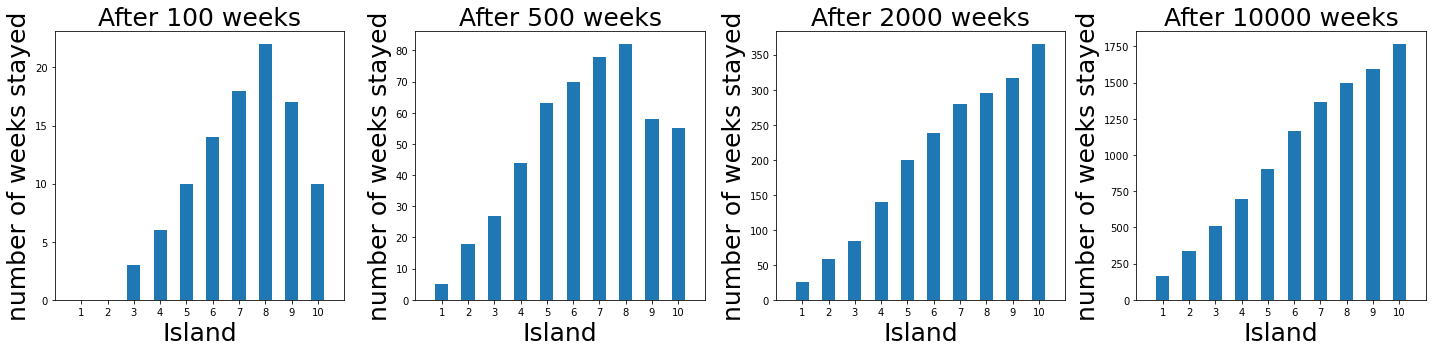

In [11]:
fig, ax = plt.subplots(figsize=(20, 5), ncols=4)
for i, idx in enumerate([99, 499, 1999, 9999]):
    ax[i].hist(positions[:idx+1], bins=range(1, 12), rwidth=0.5, align='left')
    ax[i].set_xlim(0, 11)
    ax[i].set_title(f'After {idx + 1} weeks', fontsize=25)
    ax[i].set_xticks(range(1, 11))
    ax[i].set_xlabel('Island', fontsize=25)
    ax[i].set_ylabel('number of weeks stayed', fontsize=25)
plt.tight_layout()